In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.display import clear_output
import sys
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
class Network:
    def __init__(self, shape):
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .2
        self.lam = .01
    def sigmoid(self, inputs):
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def comp_error(self, answer):
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = (self.activation[-1]-answer)*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        for i in range(len(self.biases)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()

In [3]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,200]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.61220087]
[ 0.51951213]


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [5]:
iden = np.eye(10)
acc = np.zeros((50,))
num = Network([64, 5, 10])
print num.feedforward(digits.data[89]*.01)
for i in range(50):
    for dig, ans in zip(digits.data[1:1000],digits.target[1:1000]):
        num.train(dig*.01,iden[ans])
    cor = 0
    tot = 0
    for dig, ans in zip(digits.data, digits.target):
        if num.feedforward(dig*.01).argmax()==ans:
            cor += 1
        tot += 1
    acc[i] = cor/float(tot)
print num.feedforward(digits.data[90]*.01), digits.target[90]

[ 0.54139383  0.54593611  0.54475335  0.54419564  0.55969553  0.5689474
  0.52549265  0.54888227  0.5357206   0.53419362]
[  1.12567970e-04   7.31780660e-01   1.11940041e-02   1.72668318e-02
   2.38391414e-01   5.64643930e-02   7.45156505e-04   4.69394725e-01
   9.73468918e-02   3.39710686e-02] 1


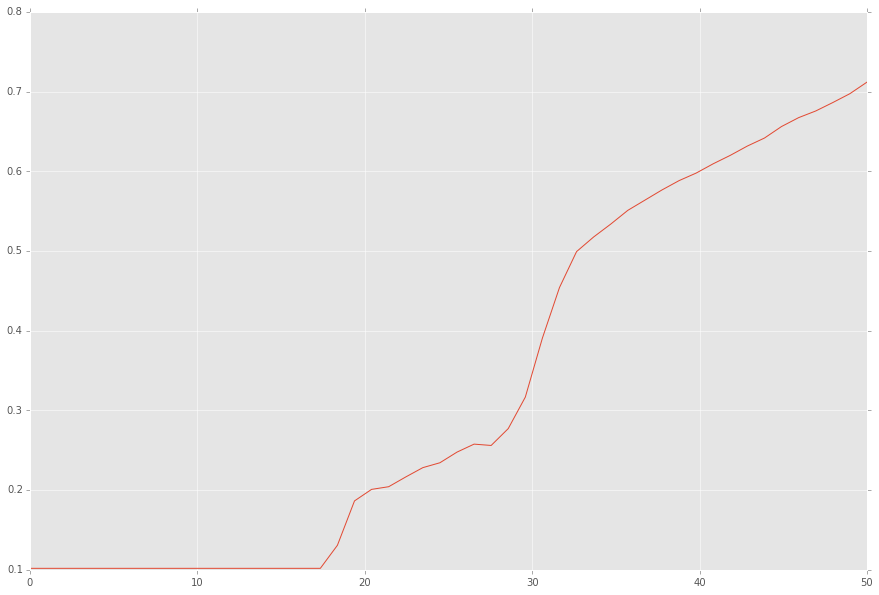

In [6]:
plt.figure(figsize=(15,10))
plt.plot(np.linspace(0,50,50),acc)

0.0
7.14285714286e-05
0.000142857142857
0.000214285714286
0.000285714285714
0.000357142857143
0.000428571428571
0.0005
0.000571428571429
0.000642857142857
0.000714285714286
0.000785714285714
0.000857142857143
0.000928571428571
0.001
0.00107142857143
0.00114285714286
0.00121428571429
0.00128571428571
0.00135714285714
0.00142857142857
0.0015
0.00157142857143
0.00164285714286
0.00171428571429
0.00178571428571
0.00185714285714
0.00192857142857
0.002
0.00207142857143
0.00214285714286
0.00221428571429
0.00228571428571
0.00235714285714
0.00242857142857
0.0025
0.00257142857143
0.00264285714286
0.00271428571429
0.00278571428571
0.00285714285714
0.00292857142857
0.003
0.00307142857143
0.00314285714286
0.00321428571429
0.00328571428571
0.00335714285714
0.00342857142857
0.0035
0.00357142857143
0.00364285714286
0.00371428571429
0.00378571428571
0.00385714285714
0.00392857142857
0.004
0.00407142857143
0.00414285714286
0.00421428571429
0.00428571428571
0.00435714285714
0.00442857142857
0.0045
0.00457

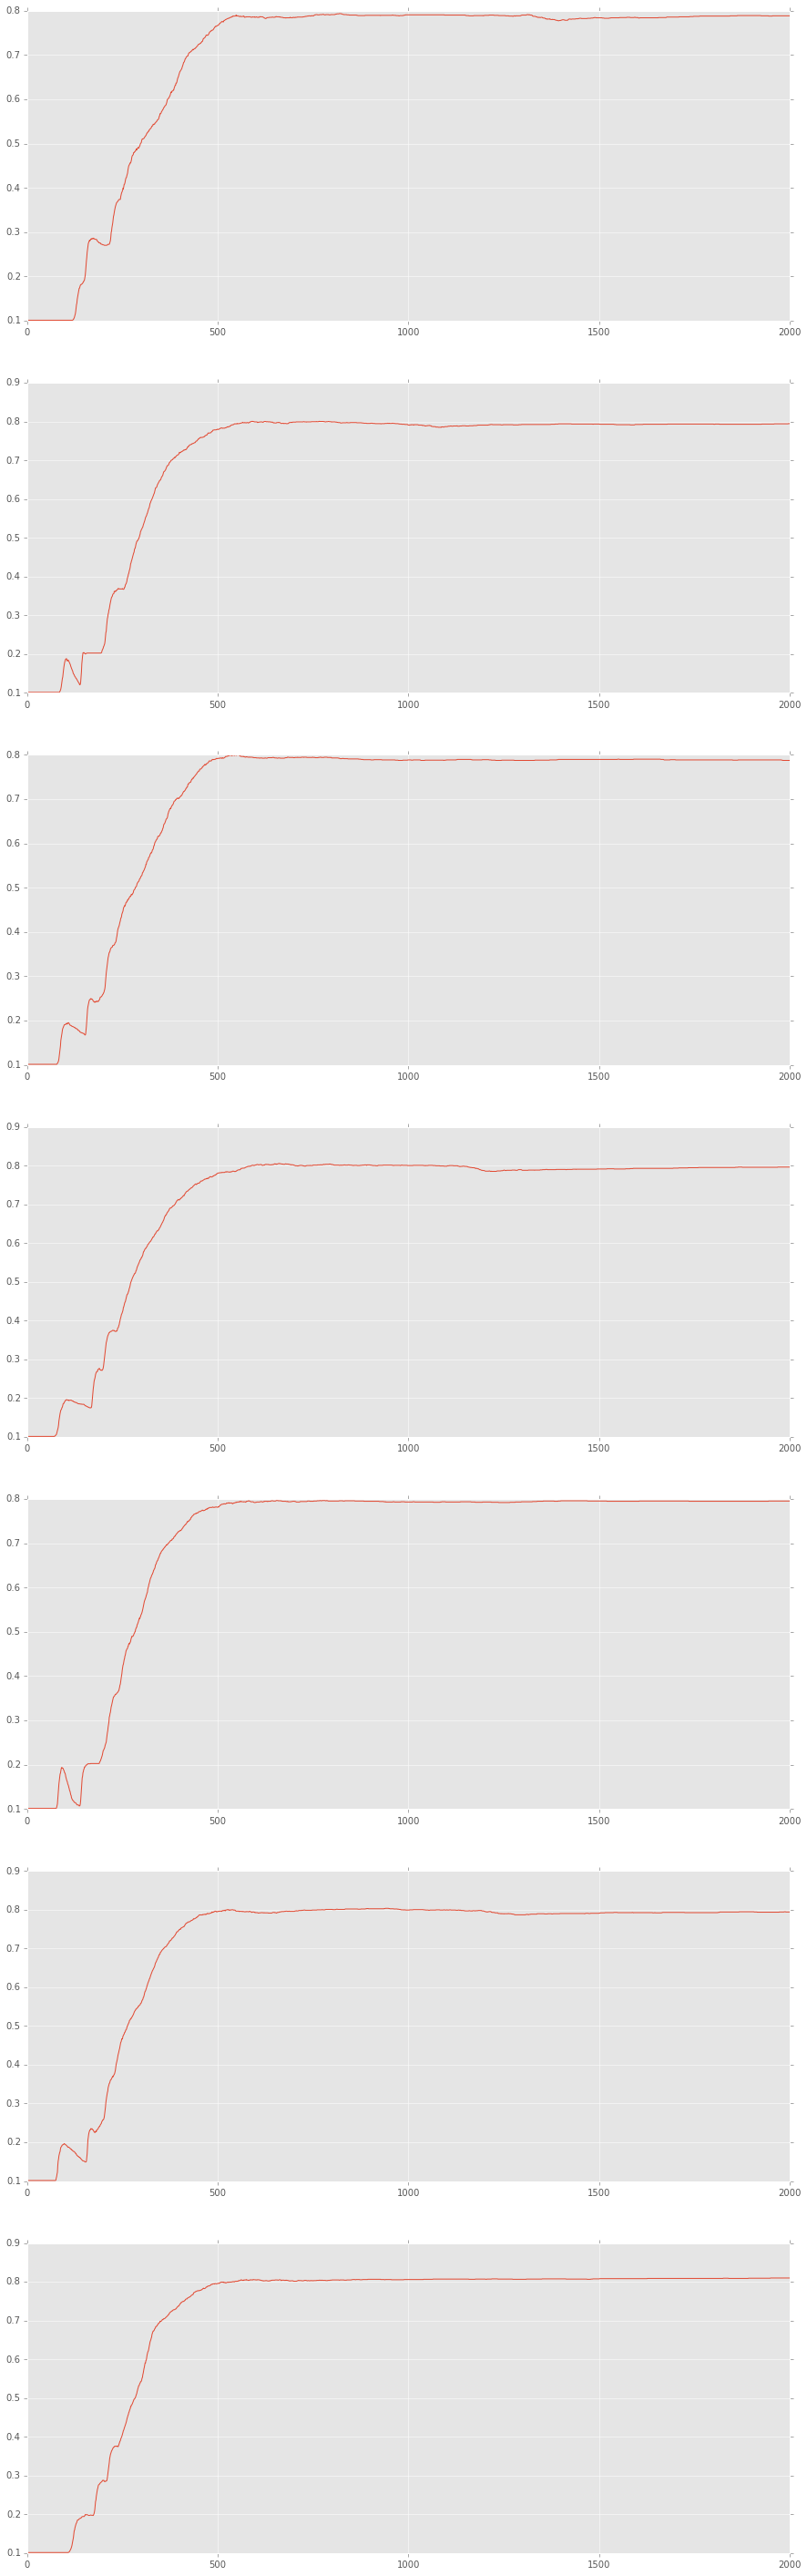

In [7]:
iden = np.eye(10)
acc = np.zeros((7,2000))
f = plt.figure(figsize = (15,50))
for h in range(8,15):
    num = Network([64, h, 10])
    for i in range(2000):
        print str(((i+2000*(h-8))/(2000.*(7))))
        for dig, ans in zip(digits.data[1:100],digits.target[1:100]):
            num.train(dig*.01,iden[ans])
        cor = 0
        tot = 0
        for dig, ans in zip(digits.data, digits.target):
            if num.feedforward(dig*.01).argmax()==ans:
                cor += 1
            tot += 1
        acc[h-8,i] = cor/float(tot)
    plt.subplot(7,1,h-7)
    plt.plot(np.linspace(0,2000,2000),acc[h-8])

In [8]:
np.savetxt("Accuracy_Data_run_5.dat", acc)

In [11]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,2000,2000), np.linspace(8,14, 7))
    ax.plot_surface(X, Y, acc)
    ax.view_init(elev=eleva, azim=az_angle)

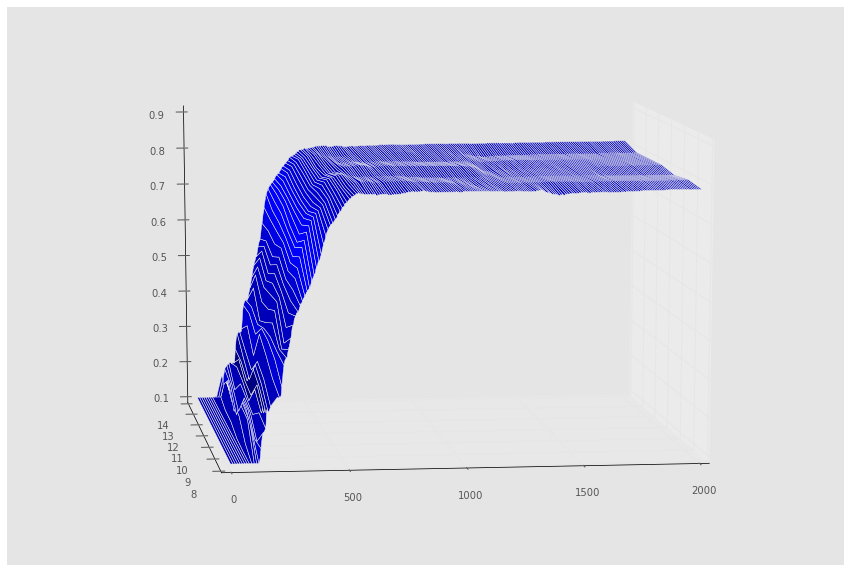

In [12]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))

In [42]:
print acc


[[ 0.10183639  0.10183639  0.10183639 ...,  0.97161937  0.97161937
   0.97161937]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97328881  0.97328881
   0.97328881]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97217585  0.97217585
   0.97217585]
 ..., 
 [ 0.10183639  0.10183639  0.10183639 ...,  0.96939343  0.96939343
   0.96939343]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97273233  0.97273233
   0.97273233]
 [ 0.10183639  0.10183639  0.10183639 ...,  0.97106288  0.97106288
   0.97106288]]
